# Kinetics of Bond Rotation Probed via NMR
## Brandon Cohen
### April 3, 2023

## Purpose

The purpose of this experiment is to use dynamic NMR spectroscopy to measure the barrier to rotation in N,N-dimethylacetamide by changing the temperature for each spectra.

## Procedure

A 10 vol% solution of DMA was mixed with DMA, the deuterated solvent, in a microfuge tube. About 600 uL of the solution was transferred to a NMR tube. The tube was placed in the NMR instrument, and lock, shimming, and tuning were performed. Then, 1H-NMR spectra were recorded starting at 298 K and were recorded in 10 K increments from 303 K to 403 K.

# Setup

## Library import
We import all the required Python libraries

In [1]:
# File handling
from pathlib import Path
import shutil
import glob
import re

# Data manipulation
import numpy as np
import scipy as sp
import pandas as pd

#NMR Data Handling
import nmrglue as ng

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("ticks")
sns.despine()

<Figure size 432x288 with 0 Axes>

## Data import

(3.5, 2.0)

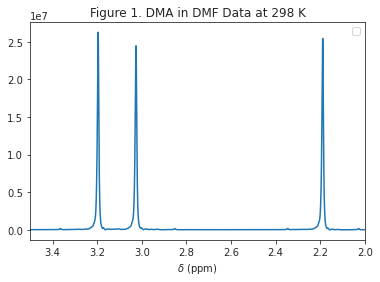

In [2]:
dest_folder_dma = Path("dma_spectra")
dic, data = ng.bruker.read_pdata(dest_folder_dma /"357dma_293/1/pdata/1")

udic = ng.bruker.guess_udic(dic, data)
uc = ng.fileiobase.uc_from_udic(udic)
###
hz_conv = (uc.hz(1)- uc.hz(2))
###
temp = dic['acqus']['TE']
solvent = dic['acqus']['SOLVENT']

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.legend([temp])
plt.title(f'Figure 1. DMA in {solvent} Data at 298 K')
ax.plot(uc.ppm_scale(), data)
ax.set(xlabel="$\delta$ (ppm)")
ax.set_xlim(3.5, 2)

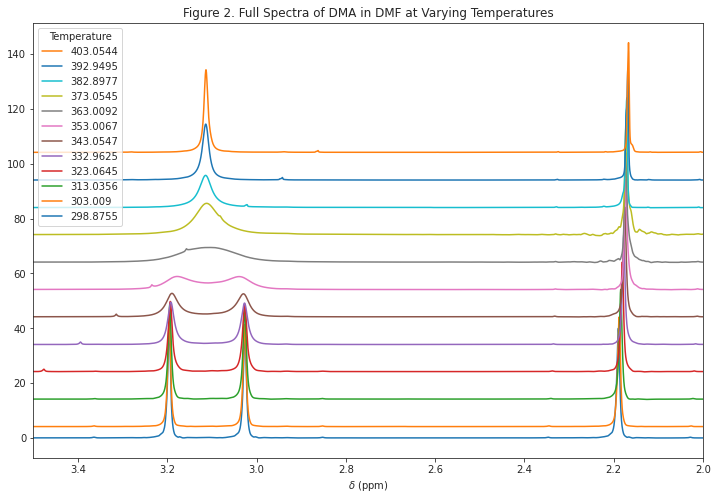

In [3]:
files = sorted(list(dest_folder_dma.glob("357dma_*/1/pdata/1")))
temps = []
fig, ax = plt.subplots(figsize=(12, 8))

peak_data = dict()

for f in files:
    dic, data = ng.bruker.read_pdata(f)
    #Scale the data by the max peak intensity of the acetyl/formyl peak
    data = data / np.max(data[44000:47000]) * 40

    #Create unit conversion object
    udic = ng.bruker.guess_udic(dic, data)
    uc = ng.fileiobase.uc_from_udic(udic)
    
    #Import proc parameters
    temp = dic["acqus"]["TE"]
    temps.append(temp)
    
    #Fit peaks using NMRglue fitting routine
    peaks = ng.peakpick.pick(data, 6, est_params=True, table=True)
    peak_list = []
    
    for peak in peaks:
        peak = {"shift": uc.hz(peak[0]),"width": hz_conv * peak[2], "intensity": uc.hz(peak[3]) }
        peak_list.append(peak)
        
    peak_data[temp] = peak_list
    
    ax.plot(uc.ppm_scale(), data + (temp-temps[0]), label=temp)

    
solvent = dic["acqus"]["SOLVENT"]

# Reverse legend labels to go from low temp at bottom to high temp at top
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Temperature', loc='upper left')
    
ax.set_xlim(3.5, 2)
ax.set(xlabel="$\delta$ (ppm)")
plt.title(f'Figure 2. Full Spectra of DMA in {solvent} at Varying Temperatures')
plt.show()
#peak_data

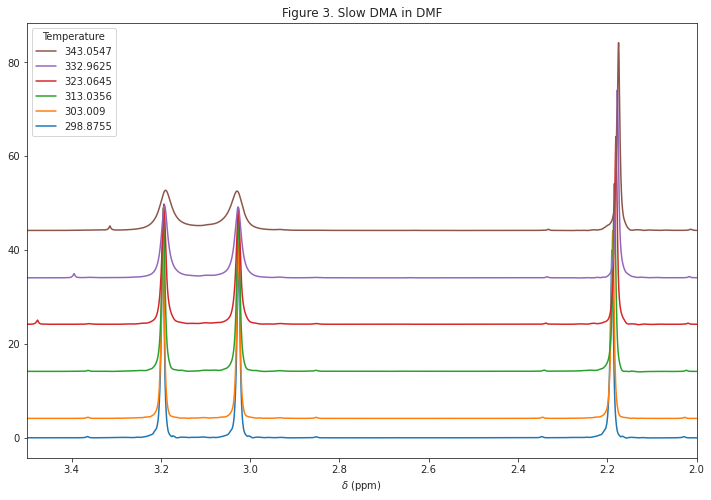

In [4]:
temps = []
fig, ax = plt.subplots(figsize=(12, 8))
peak_data_slow = dict()

for f in files[:6]:
    dic, data = ng.bruker.read_pdata(f)
    #Scale the data by the max peak intensity of the acetyl/formyl peak
    data = data / np.max(data[44000:47000]) * 40

    #Create unit conversion object
    udic = ng.bruker.guess_udic(dic, data)
    uc = ng.fileiobase.uc_from_udic(udic)
    
    #Import proc parameters
    temp = dic["acqus"]["TE"]
    temps.append(temp)
    
    #Fit peaks using NMRglue fitting routine
    peaks = ng.peakpick.pick(data, 6, est_params=True, table=True)
    peak_list = []
    
    for peak in peaks:
        peak = {"shift": uc.hz(peak[0]), "width": hz_conv * peak[2], "intensity": uc.hz(peak[3]) }
        peak_list.append(peak)
        
    peak_data_slow[temp] = peak_list
    
    ax.plot(uc.ppm_scale(), data + (temp-temps[0]), label=temp)

    
solvent = dic["acqus"]["SOLVENT"]

# Reverse legend labels to go from low temp at bottom to high temp at top
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Temperature', loc='upper left')
    
ax.set_xlim(3.5, 2)
ax.set(xlabel="$\delta$ (ppm)")
plt.title(f'Figure 3. Slow DMA in {solvent}')

plt.show()
#peak_data_slow

In [5]:
# Calculating k using Eq. 20

fwhm_init = peak_data_slow[298.8755][0]["width"]

k_vals_slow = {}

for temp in peak_data_slow.keys():
    k = np.pi * (peak_data_slow[temp][0]["width"] - fwhm_init)
    k_vals_slow[temp] = k
    
k_vals_slow

{298.8755: 0.0,
 303.009: 0.10582825378830715,
 313.0356: 1.1028421950143195,
 323.0645: 4.198059394813078,
 332.9625: 12.384880544982323,
 343.0547: 17.260435302069208}

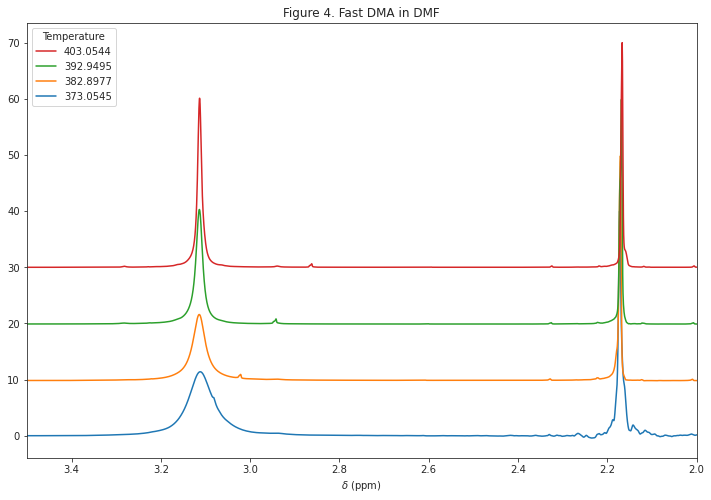

In [6]:
temps = []
fig, ax = plt.subplots(figsize=(12, 8))

peak_data_fast = dict()

for f in files[-4:]:
    dic, data = ng.bruker.read_pdata(f)
    #Scale the data by the max peak intensity of the acetyl/formyl peak
    data = data / np.max(data[44000:47000]) * 40

    #Create unit conversion object
    udic = ng.bruker.guess_udic(dic, data)
    uc = ng.fileiobase.uc_from_udic(udic)
    
    #Import proc parameters
    temp = dic["acqus"]["TE"]
    temps.append(temp)
    
    #Fit peaks using NMRglue fitting routine
    peaks = ng.peakpick.pick(data, 6, est_params=True, table=True)
    peak_list = []
    
    for peak in peaks:
        peak = {"shift": uc.hz(peak[0]), "width": hz_conv * peak[2], "intensity": uc.hz(peak[3]) }
        peak_list.append(peak)
        
    peak_data_fast[temp] = peak_list
    
    ax.plot(uc.ppm_scale(), data + (temp-temps[0]), label=temp)

    
solvent = dic["acqus"]["SOLVENT"]

# Reverse legend labels to go from low temp at bottom to high temp at top
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Temperature', loc='upper left')
    
ax.set_xlim(3.5, 2)
ax.set(xlabel="$\delta$ (ppm)")
plt.title(f'Figure 4. Fast DMA in {solvent}')

plt.show()
#peak_data_fast


In [7]:
#Eq. 25

delta_nu_init = abs(peak_data_slow[298.8755][0]["shift"] - peak_data_slow[298.8755][1]["shift"])

k_vals_fast = {}

for temp in peak_data_fast.keys():
    k = np.pi * delta_nu_init**2 / (2 * (peak_data_fast[temp][0]["width"] - fwhm_init) )
    k_vals_fast[temp] = k
    
k_vals_fast

{373.0545: 332.4658211734324,
 382.8977: 721.9971524993666,
 392.9495: 2057.434303472173,
 403.0544: 5732.098992513271}

[Text(0.5, 0, '$\\delta$ (ppm)')]

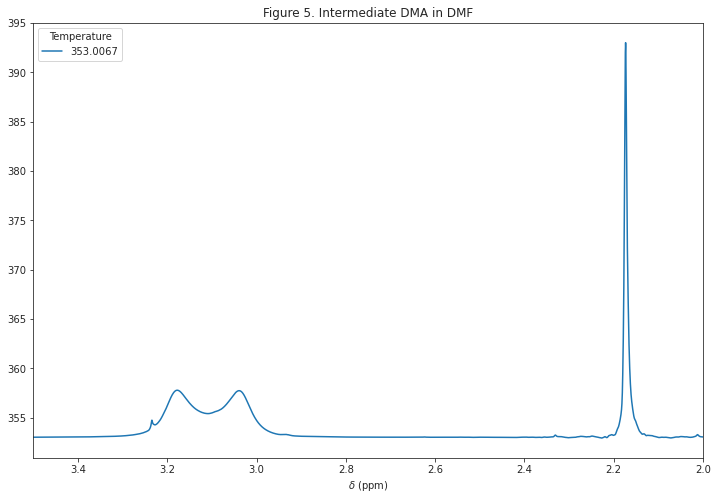

In [8]:
#Plot Intermediate Intermediate Effect of NMR Lineshape

fig, ax = plt.subplots(figsize=(12, 8))
#peak = {"shift": uc.hz(peak[0]), "width": uc.hz(peak[2]), "intensity": uc.hz(peak[3]) }


dic, data = ng.bruker.read_pdata(files[6])
#Scale the data by the max peak intensity of the acetyl/formyl peak
data = data / np.max(data[44000:47000]) * 40

#Create unit conversion object
udic = ng.bruker.guess_udic(dic, data)
uc = ng.fileiobase.uc_from_udic(udic)
    
#Import proc parameters
temp = dic["acqus"]["TE"]

############################

#Fit peaks using NMRglue fitting routine
peaks = ng.peakpick.pick(data, 6, est_params=True, table=True)
for peak_353 in peaks:
    peak_353 = {"shift": uc.hz(peak_353[0]), "width": hz_conv * peak_353[2], "intensity": uc.hz(peak_353[3]) }

################################

ax.plot(uc.ppm_scale(), data + temp, label=temp)

solvent = dic["acqus"]["SOLVENT"]

# Reverse legend labels to go from low temp at bottom to high temp at top
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Temperature', loc='upper left')
    
ax.set_xlim(3.5, 2)
plt.title(f'Figure 5. Intermediate DMA in {solvent}')
ax.set(xlabel="$\delta$ (ppm)")

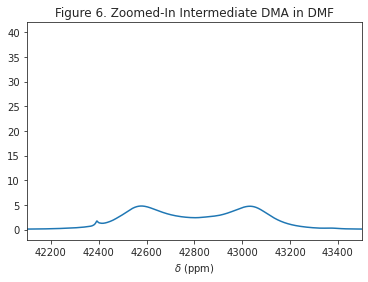

In [9]:
#Two Peaks in the 
plt.plot(data)
plt.xlim([42100, 43500])
plt.title(f"Figure 6. Zoomed-In Intermediate DMA in {solvent}")
plt.xlabel("$\delta$ (ppm)")
plt.show()

In [10]:
# Calculate k using Eq. 22

I_min = np.min(data[42600:43100])
I_max = np.max(data[42400:43200])

r = I_max / I_min
#delta_nu_0 = abs(peak_353[353.0067][0]["shift"] - peak_353[353.0067][1]["shift"])
delta_nu_init = abs(peak_data_slow[298.8755][0]["shift"] - peak_data_slow[298.8755][1]["shift"])

k_ratios = (np.pi * delta_nu_init) / ( np.sqrt(2 * (r + np.sqrt(r**2 - r) ) ) ) 

k_ratio = dict()
k_ratio[353.0067] = k_ratios

In [11]:
k = dict()
k.update(k_vals_slow)
k.update(k_ratio)
k.update(k_vals_fast)
d = pd.DataFrame(pd.DataFrame(k.items()))

d.rename(columns = {'d':'H'}, inplace = True)
d.rename(columns={0: "Temperature", 1: "Rate Constant"}, inplace=True,)
print("Table 1. Rate Constants at Varying Temperatures")
d

Table 1. Rate Constants at Varying Temperatures


,Temperature,Rate Constant
0,298.8755,0.000000
1,303.0090,0.105828
2,313.0356,1.102842
3,323.0645,4.198059
4,332.9625,12.384881
5,343.0547,17.260435
6,353.0067,81.851355
7,373.0545,332.465821
8,382.8977,721.997152
9,392.9495,2057.434303


## Data processing

In [12]:
temperature = list(k.keys())
k_values = list(k.values())

data_k = { "k" : k_values, "Temperature" : temperature }

k_df = pd.DataFrame(data_k)
k_df = k_df.drop(index=0)

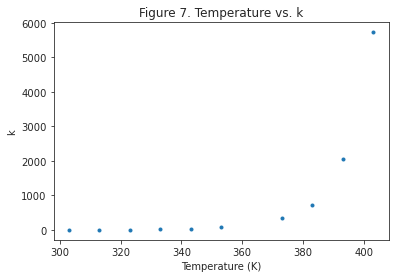

In [13]:
plt.plot(k_df['Temperature'], k_df['k'], '.')
plt.xlabel('Temperature (K)')
plt.ylabel('k') 
plt.title('Figure 7. Temperature vs. k') # wrapping the input in `$` turns it into LaTeX math
plt.show()

Text(0.5, 0.98, 'Figure 8. 1/T vs. ln(k/T)')

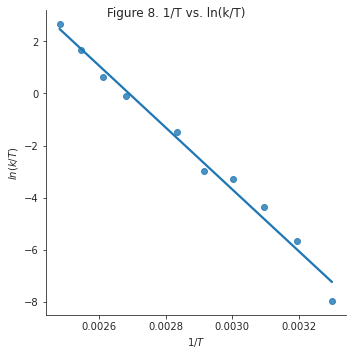

In [14]:
y = list(np.log(k_df['k']/k_df['Temperature']))
x = list(1/k_df['Temperature'])
plot_data = { "$1/T$" : x, "$ln(k/T)$" : y }

data = pd.DataFrame(plot_data)
sns.lmplot(data=data, x="$1/T$", y="$ln(k/T)$", ci=None).fig.suptitle("Figure 8. 1/T vs. ln(k/T)")

In [15]:
# Calculating ΔG. ΔH. ΔS

R = sp.constants.gas_constant

## Fitting using the `numpy.polyfit()` function for uncleaved PVOH samples
# Function returns fit coefficiences (1d array of values) and an n x n covariance matrix
fit_coeff, fit_cov = np.polyfit(1/k_df["Temperature"], np.log(k_df['k']/k_df['Temperature']), 1, cov=True)
# Finding the standard error of each coefficient 
fit_err = np.sqrt(np.diag(fit_cov))

print(f"The ΔH is: {round((-fit_coeff[0]/1000)*R,3)} kJ/mol and the std. err. of the energy is: {round(fit_err[0]/1000 * R, 3)} kJ/mol")

H = (-fit_coeff[0])*R #J/mol
S = ( fit_coeff[1] - np.log(sp.constants.Boltzmann/sp.constants.Planck) ) * R #J/(K*mol)
G = H - (363*S) #J/mol


The ΔH is: 98.517 kJ/mol and the std. err. of the energy is: 4.036 kJ/mol


In [16]:
lit_G = 17 * 4.184
lit_H = 16 * 4.184
lit_S = (-2.1 * 4.184)/1000

cal_values = [round(G/1000, 2), round(H/1000, 2), round(S/1000, 2)]
lit_values = [round(lit_G, 2), round(lit_H, 2), round(lit_S, 2)]
values = { "" : ['ΔG (kJ/mol)', 'ΔH (kJ/mol)', 'ΔS (kJ/mol)'], "Experimental Values" : cal_values, "Literature Values" : lit_values}

df = pd.DataFrame(values)
print("Table 2. Calculated and Literature Values")
df

Table 2. Calculated and Literature Values


,,Experimental Values,Literature Values
0,ΔG (kJ/mol),74.03,71.13
1,ΔH (kJ/mol),98.52,66.94
2,ΔS (kJ/mol),0.07,-0.01


## Results

In Figure 1, the 1H spectrum of N,N-dimethylacetamide can be shown with three peaks: three methyl groups at 3.2 ppm, 3.05 ppm, and 2.2 ppm. The methyl protons on the acetyl functional group is assigned to the 2.2 ppm peak because it experiences the most amount of shielding. The 3.05 ppm peak (A) is assigned to the methyl group attached to the nitrogen. The 3.2 ppm peak (B) is assigned to the the methyl group attached to the nitrogen that is closet to the oxygen. The assignment of B was determined because deshielding will be experienced by the protons due to the electronegative oxygen allowing for the protons to feel more of the external magnetic field and shifting the peak more downfield in relation to peak A. The process of the rotation of the N-methyl groups can be thought of as cis-trans isomerization. An interesting property of this rotation is the rate at which it occurs. Based on Table 1 and Figure 7, it can be shown that as the temperature increases, the rate constant grows exponentially which is consistent with the Arrhenius Theory. In Figure 2, the full spectra of varying temperatures supports the idea that as temperature increases, the bond rotation increases causing linewidth to also increase. As the rate of bond rotation increased to higher rates, the two peaks (A and B) coalesce until there was only one peak with a frequency half way between each resonance frequency. This coalescence was first detected at 363 K.

The NMR spectra was quite helpful in determining rate constants, but it becamore more useful when aplied to the Eyring equation which is a form of the Arrhenius Equation that takes into account Transition State Theory. In Figure 8, the Eyring equation was used to determine the $\Delta G$, $\Delta H$, $\Delta S$ at the transition state. This trend of the graph was a negative linear relationship such that when temperature decreased, the log of k/T also decreased. After manipulation of the slope of the line, change in enthalpy at the transition state was determined to be 98.52 kJ/mol. This value varies from the literature value of 66.94 kJ/mol. The calculated entropy was 0.07 kJ/mol which varied a little from the literature value of -0.01 kJ/mol. The calculated Gibb’s free energy was 74.03 kJ/mol which was very similar the literature value of 71.13 kJ/mol. While there is variation in the calculated values compared to the literature values, it is believed the procedure was well performed, but there could have been better precaution for pipetting and measuring errors. In conclusion, NMR was successively used to confirm the presence of bond rotation through the coalescence peak as well as calculate rate constants that support the Eyring equation.

## References

1. Francis P. Gasparro and Nancy H. Kolodny
Journal of Chemical Education 1977 54 (4), 258
DOI: 10.1021/ed054p258.